In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('desktop/Spam Email Detection.csv')

# DATA PREPROCESSING


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Here we have some extra unwanted columns called Unnamed, so we have to eliminate those columns first.

In [6]:
# Drop columns with "Unnamed" in their names
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# dataset shape
print(f'Rows = {df.shape[0]}')
print(f'Columns = {df.shape[1]}')

Rows = 5572
Columns = 2


In [9]:
# Now all the unwanted columns are eliminated. There are 5572 rows and 2 columns in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Display the column names
print('Columns:\n')
for i in df.columns:
    print(i)

Columns:

v1
v2


In [12]:
#Renaming the columns for the ease of analysis

In [13]:
#Renaming the columns
df.rename(columns={'v1': 'Email_type', 
                  'v2': 'Message'}, inplace=True)

#Display the new column names
print('Renamed Columns:\n')
for i in df.columns:
    print(i)



Renamed Columns:

Email_type
Message


In [14]:
df.head()

,Email_type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Email_type    0
Message       0
dtype: int64

In [16]:
# Here we can see that our dataset does not contain any null values so we are ready to move further.

In [17]:
# Display duplicate rows
print(f'Duplicate Rows: {df.duplicated().sum()}')

Duplicate Rows: 409


In [18]:
# The dataset contains many  duplicate rows, so we need to remove them first

In [19]:
# Remove duplicate rows
df= df.drop_duplicates()

# Display DataFrame after removing duplicates
print("\nShape of the dataset after removing duplicates:")
print(df.shape)


Shape of the dataset after removing duplicates:
(5163, 2)


# EXPLORATORY DATA ANALYSIS

In [21]:
df['Email_type'].value_counts()

Email_type
ham     4516
spam     647
Name: count, dtype: int64

In [22]:
# We have 4516 ham records and 647 spam records in our dataset

In [23]:
# Converting the object type data in Email_type into categorical data

In [24]:
df.loc[df['Email_type'] == 'spam','Email_type'] = 0
df.loc[df['Email_type'] == 'ham','Email_type'] = 1

In [25]:
df['Email_type'].value_counts()

Email_type
1    4516
0     647
Name: count, dtype: int64

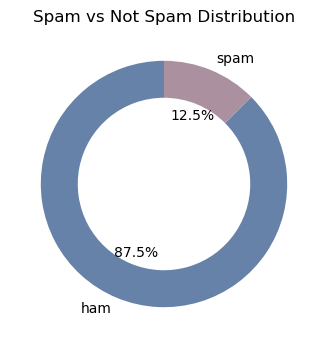

In [26]:
import matplotlib.pyplot as plt

# Value counts for Email_type
value_counts = df['Email_type'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # 1 row, 1 column of subplots

# Donut Chart
ax.pie(value_counts, 
       labels=['ham','spam'],
       autopct='%1.1f%%', 
       startangle=90, 
       colors=["#6782a8", "#ab90a0"], 
       wedgeprops=dict(width=0.3))

# Set title
ax.set_title('Spam vs Not Spam Distribution')

# Show the plot
plt.show()


In [ ]:
# We can see that maximum number of mails are ham mails,only few are spam mails 

#CLASS IMBALANCE TREATMENT

In [28]:
# class count
class_count_0, class_count_1 = df['Email_type'].value_counts()

# Separate class
class_0 = df[df['Email_type'] == 1]
class_1 = df[df['Email_type'] == 0]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4516, 2)
class 1: (647, 2)


In [29]:
# Here we can say the class is highly imbalanced.So to eliminate the biaseness, we have to perform class imbalance treatment.

In [30]:
#Class imbalance treatment using undersampling method.

Total class of 1 and 0:
 Email_type
0    100
1    100
Name: count, dtype: int64


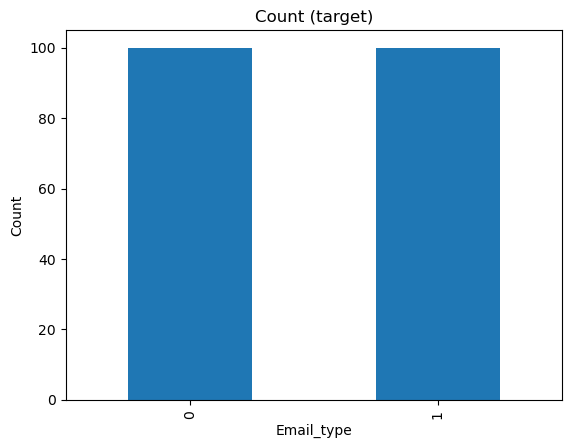

In [31]:
df = pd.DataFrame({
    'Message': [f'Message {i}' for i in range(1000)],  # Use strings for the 'Message' column
    'Email_type': [0] * 900 + [1] * 100  # Example with imbalance
})

# Separate majority and minority classes
class_0 = df[df['Email_type'] == 0]
class_1 = df[df['Email_type'] == 1]

# Count the number of instances in the minority class
class_count_1 = class_1.shape[0]

# Under-sample the majority class
class_0_under = class_0.sample(class_count_1, random_state=1)

# Concatenate the minority class with the under-sampled majority class
test_under = pd.concat([class_0_under, class_1], axis=0)

# Shuffle the resulting DataFrame
test_under = test_under.sample(frac=1, random_state=1).reset_index(drop=True)

# Print the count of each class
print("Total class of 1 and 0:\n", test_under['Email_type'].value_counts())

# Plot the count after under-sampling
test_under['Email_type'].value_counts().plot(kind='bar', title='Count (target)')
plt.xlabel('Email_type')
plt.ylabel('Count')
plt.show()


In [32]:
# Now we can say the machine can perform unbiasly.

# MODEL BUILDING AND TRAINING

In [34]:
x=df['Message']
y=df['Email_type']

In [35]:
print(x)

0        Message 0
1        Message 1
2        Message 2
3        Message 3
4        Message 4
          ...     
995    Message 995
996    Message 996
997    Message 997
998    Message 998
999    Message 999
Name: Message, Length: 1000, dtype: object


In [36]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Email_type, Length: 1000, dtype: int64


In [37]:
#Splitting the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [38]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1000,)
(800,)
(200,)


In [39]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)


In [40]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)


In [41]:
#convert y_train and y_test value as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [42]:
print(x_train)

78      Message 78
109    Message 109
201    Message 201
465    Message 465
143    Message 143
          ...     
952    Message 952
643    Message 643
249    Message 249
664    Message 664
874    Message 874
Name: Message, Length: 800, dtype: object


In [43]:
print(x_train_features)

  (0, 603)	0.9899288535046231
  (0, 792)	0.14156576210024283
  (1, 6)	0.9899288535046231
  (1, 792)	0.14156576210024283
  (2, 87)	0.9899288535046231
  (2, 792)	0.14156576210024283
  (3, 325)	0.9899288535046231
  (3, 792)	0.14156576210024283
  (4, 38)	0.9899288535046231
  (4, 792)	0.14156576210024283
  (5, 704)	0.9899288535046231
  (5, 792)	0.14156576210024283
  (6, 92)	0.9899288535046231
  (6, 792)	0.14156576210024283
  (7, 146)	0.9899288535046231
  (7, 792)	0.14156576210024283
  (8, 204)	0.9899288535046231
  (8, 792)	0.14156576210024283
  (9, 1)	0.9899288535046231
  (9, 792)	0.14156576210024283
  (10, 595)	0.9899288535046231
  (10, 792)	0.14156576210024283
  (11, 320)	0.9899288535046231
  (11, 792)	0.14156576210024283
  (12, 792)	1.0
  :	:
  (787, 792)	0.14156576210024283
  (788, 515)	0.9899288535046231
  (788, 792)	0.14156576210024283
  (789, 679)	0.9899288535046231
  (789, 792)	0.14156576210024283
  (790, 543)	0.9899288535046231
  (790, 792)	0.14156576210024283
  (791, 495)	0.989928

In [44]:
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [45]:
#Prediction on training data

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train,prediction_on_training_data) 

In [46]:
print('Accuracy on training data : ',accuracy_on_training_data)

Accuracy on training data :  0.89


#MODEL TESTING 

In [48]:
#Prediction on testing data

prediction_on_testing_data = model.predict(x_test_features)
accuracy_on_testing_data = accuracy_score(y_test,prediction_on_testing_data) 

In [49]:
print('Accuracy on testing data : ',accuracy_on_testing_data)

Accuracy on testing data :  0.94


In [ ]:
# Here we can see that our model is performing well on both training and testing data.
# Now we will build a predictive system to see if our model predicts correctly or not.

#BUILDING A PREDICTIVE SYSTEM 

In [51]:
input_mail=["England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+"]

#Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)


if prediction[0]==1:
    print('ham mail')
else:
    print('spam mail')

[0]
spam mail


In [ ]:
# We can conclude that our model is predicting correctly

#CONCLUSIONS